# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\ProgramData\Anaconda3\envs\tensorflow_cpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
# def build_mlp():
#     """
#     Build your own model
#     """
    
#     return model
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
# """
# Set your required experiment parameters
# """

LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 10
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
# """
# 建立你的訓練與實驗迴圈並蒐集資料
# """

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 282us/step - loss: 2.2387 - acc: 0.1725 - val_loss: 2.1626 - val_acc: 0.2333
Epoch 2/10
50000/50000 [==============================] - 14s 282us/step - loss: 2.1122 - acc: 0.2542 - val_loss: 2.0694 - val_acc: 0.2762
Epoch 3/10
50000/50000 [==============================] - 14s 280us/step - loss: 2.0351 - acc: 0.2880 - val_loss: 2.0045 - val_acc: 0.2971
Epoch 4/10
50000/50000 [==============================] - 15s 290us/step - loss: 1.9806 - acc: 0.3079 - val_loss: 1.9592 - val_acc: 0.3097
Epoch 5/10
50000/50000 [==============================] - 14s 286us/step - loss: 1.9419 - acc: 0.3235 - val_loss: 1.9262 - val_acc: 0.3266
Epoch 6/10
50000/50000 [==============================] - 14s 278us/step - loss: 1.9128 - acc: 0.3347 - val_loss: 1.9004 - val_acc: 0.3353
Epoch 7/10
50000/50000 [==============================] - 14s 280us/step - loss: 1.8890 - acc: 0.3428 - val_loss: 1.

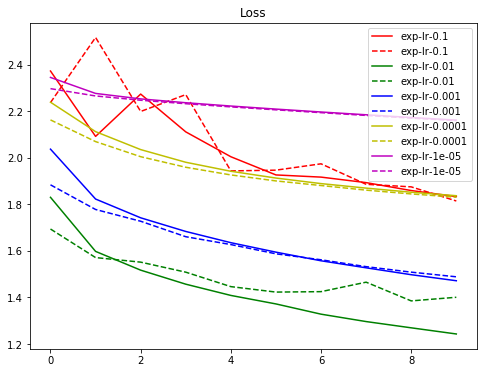

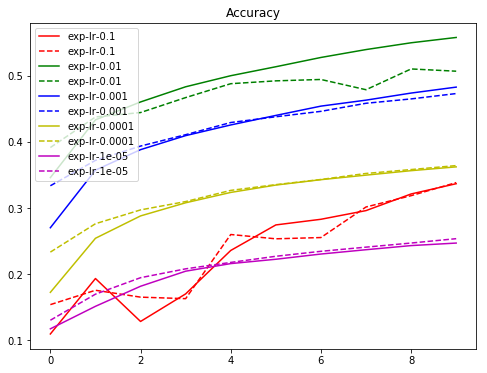

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# """
# 將實驗結果繪出
# """
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

RMSprop

In [12]:
results = {}
# """
# 建立你的訓練與實驗迴圈並蒐集資料
# """

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 16s 323us/step - loss: 1.9710 - acc: 0.2907 - val_loss: 1.8892 - val_acc: 0.3143
Epoch 2/10
50000/50000 [==============================] - 16s 318us/step - loss: 1.7888 - acc: 0.3630 - val_loss: 1.8215 - val_acc: 0.3296
Epoch 3/10
50000/50000 [==============================] - 15s 307us/step - loss: 1.7086 - acc: 0.3919 - val_loss: 1.7074 - val_acc: 0.3892
Epoch 4/10
50000/50000 [==============================] - 16s 311us/step - loss: 1.6533 - acc: 0.4135 - val_loss: 1.6999 - val_acc: 0.3754
Epoch 5/10
50000/50000 [==============================] - 16s 313us/step - loss: 1.6065 - acc: 0.4304 - val_loss: 1.5946 - val_acc: 0.4261
Epoch 6/10
50000/50000 [==============================] - 15s 305us/step - loss: 1.5681 - acc: 0.4451 - val_loss: 1.7107 - val_acc: 0.3898
Epoch 7/10
50000/50000 [==============================] - 15s 307us/step - loss: 1.5349 - acc: 0.4540 - val_loss: 1.

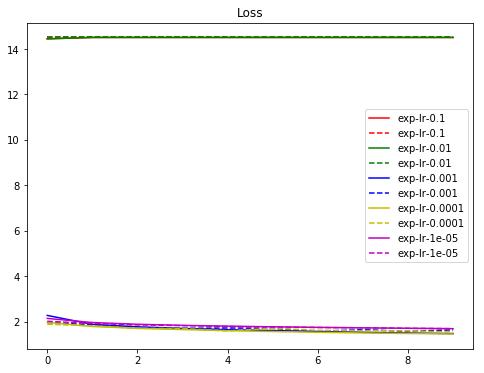

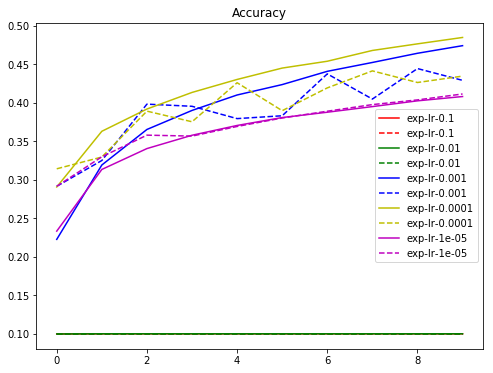

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# """
# 將實驗結果繪出
# """
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Adagrad

In [14]:
results = {}
# """
# 建立你的訓練與實驗迴圈並蒐集資料
# """

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 310us/step - loss: 2.0447 - acc: 0.2766 - val_loss: 1.9520 - val_acc: 0.3157
Epoch 2/10
50000/50000 [==============================] - 15s 309us/step - loss: 1.9194 - acc: 0.3320 - val_loss: 1.8944 - val_acc: 0.3416
Epoch 3/10
50000/50000 [==============================] - 15s 305us/step - loss: 1.8770 - acc: 0.3465 - val_loss: 1.8652 - val_acc: 0.3504
Epoch 4/10
50000/50000 [==============================] - 15s 307us/step - loss: 1.8512 - acc: 0.3561 - val_loss: 1.8426 - val_acc: 0.3557
Epoch 5/10
50000/50000 [==============================] - 15s 308us/step - loss: 1.8318 - acc: 0.3626 - val_loss: 1.8273 - val_acc: 0.3650
Epoch 6/10
50000/50000 [==============================] - 16s 314us/step - loss: 1.8163 - acc: 0.3684 - val_loss: 1.8153 - val_acc: 0.3684
Epoch 7/10
50000/50000 [==============================] - 16s 321us/step - loss: 1.8034 - acc: 0.3734 - val_loss: 1.

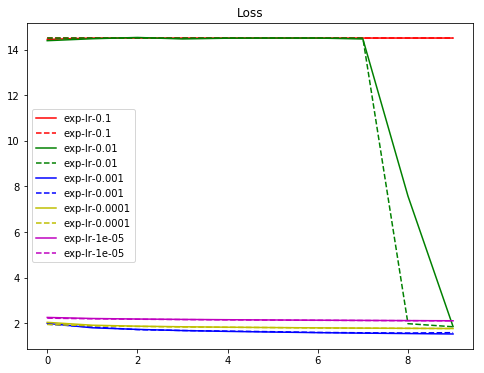

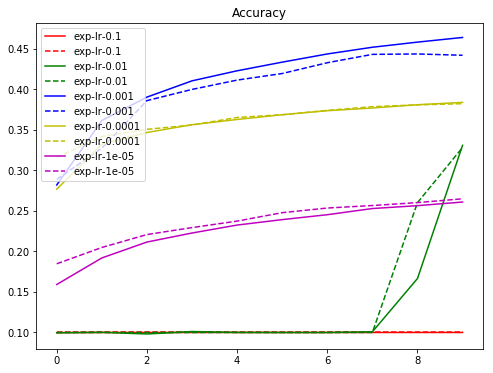

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# """
# 將實驗結果繪出
# """
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

Adam

In [16]:
results = {}
# """
# 建立你的訓練與實驗迴圈並蒐集資料
# """

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 18s 355us/step - loss: 1.9043 - acc: 0.3193 - val_loss: 1.7543 - val_acc: 0.3794
Epoch 2/10
50000/50000 [==============================] - 19s 380us/step - loss: 1.7089 - acc: 0.3961 - val_loss: 1.6708 - val_acc: 0.4143
Epoch 3/10
50000/50000 [==============================] - 18s 358us/step - loss: 1.6273 - acc: 0.4235 - val_loss: 1.6244 - val_acc: 0.4168
Epoch 4/10
50000/50000 [==============================] - 18s 358us/step - loss: 1.5704 - acc: 0.4448 - val_loss: 1.5532 - val_acc: 0.4532
Epoch 5/10
50000/50000 [==============================] - 18s 363us/step - loss: 1.5325 - acc: 0.4589 - val_loss: 1.5521 - val_acc: 0.4525
Epoch 6/10
50000/50000 [==============================] - 18s 356us/step - loss: 1.4907 - acc: 0.4731 - val_loss: 1.5002 - val_acc: 0.4664
Epoch 7/10
50000/50000 [==============================] - 18s 355us/step - loss: 1.4558 - acc: 0.4855 - val_loss: 1.

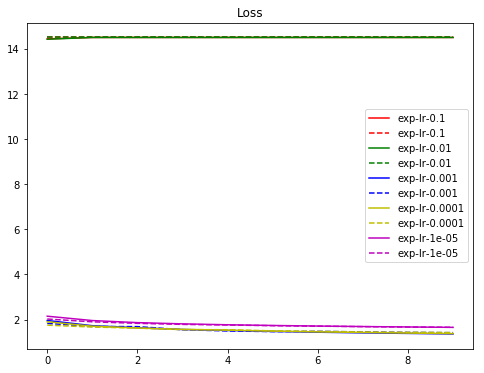

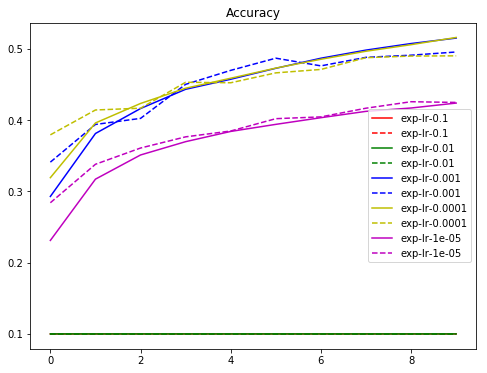

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# """
# 將實驗結果繪出
# """
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()